In [77]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from IPython.display import display, HTML, clear_output
import time
import collections
import heapq
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt



def display_matrix(matrix):
    rows = len(matrix)
    columns = len(matrix[0])
    pl.figure()
    tb = pl.table(cellText=matrix, loc=(0,0), cellLoc='center')
    tc = tb.properties()['children']
    for cell in tc: 
        cell.set_height(1/rows)
        cell.set_width(1/columns)
    ax = pl.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    
def draw_graph(edges, edge_labels=None):
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    plt.figure()    
    nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
    node_size=500,node_color='pink',alpha=0.9,\
    labels={node:node for node in G.nodes()})
    if edge_labels is None:
        edge_labels = {tuple(edge): str(edge[0]+'-'+str(edge[1])) for edge in edges}
    else:
        edge_labels = {tuple(edges[i]):edge_labels[i] for i in range(len(edges))}
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')
    plt.axis('off')
    plt.show()

    
def draw_tree(tree, binary=True):

    def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

        '''
        From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
        Licensed under Creative Commons Attribution-Share Alike 

        If the graph is a tree this will return the positions to plot this in a 
        hierarchical layout.

        G: the graph (must be a tree)

        root: the root node of current branch 
        - if the tree is directed and this is not given, 
          the root will be found and used
        - if the tree is directed and this is given, then 
          the positions will be just for the descendants of this node.
        - if the tree is undirected and not given, 
          then a random choice will be used.

        width: horizontal space allocated for this branch - avoids overlap with other branches

        vert_gap: gap between levels of hierarchy

        vert_loc: vertical location of root

        xcenter: horizontal location of root
        '''
        if not nx.is_tree(G):
            raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

        if root is None:
            if isinstance(G, nx.DiGraph):
                root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
            else:
                root = random.choice(list(G.nodes))

        def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
            '''
            see hierarchy_pos docstring for most arguments

            pos: a dict saying where all nodes go if they have been assigned
            parent: parent of this branch. - only affects it if non-directed

            '''

            if pos is None:
                pos = {root:(xcenter,vert_loc)}
            else:
                pos[root] = (xcenter, vert_loc)
            children = list(G.neighbors(root))
            if not isinstance(G, nx.DiGraph) and parent is not None:
                children.remove(parent)  
            if len(children)!=0:
                dx = width/len(children) 
                nextx = xcenter - width/2 - dx/2
                for child in children:
                    nextx += dx
                    pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                        vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                        pos=pos, parent = root)
            return pos


        return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    
    
    if binary:
        edges = []
        node_map = {}
        for i in range(1,len(tree)):
            if tree[i] not in node_map:
                node_map[tree[i]] = ord('a')
            else:
                node_map[tree[i]] +=1
            tree[i] = str(tree[i])+chr(node_map[tree[i]])
        curr = 1
        for i in range(len(tree)):
            for j in range(0, 2):
                if curr>=len(tree):
                    pass
                else:
                    edges.append([tree[i], tree[curr]])
                    curr+=1
        tree = edges
    G=nx.Graph()
    G.add_edges_from(tree)
    pos = hierarchy_pos(G,1)    
    nx.draw(G, pos=pos, with_labels=True)
    plt.axis('off')
    plt.show()

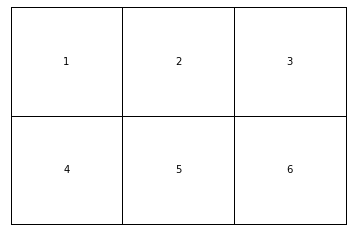

In [78]:
display_matrix([[1,2,3],[4,5,6]])

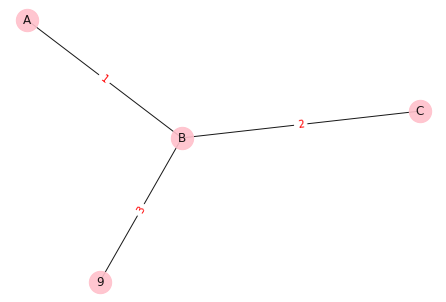

In [79]:
draw_graph([['A','B'],['B','C'],['B',9]], [1, 2, 3])

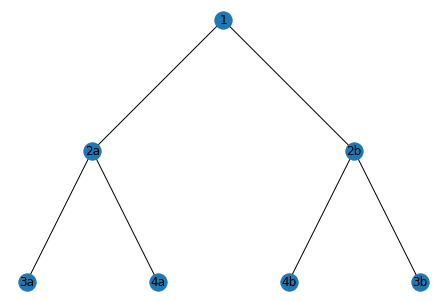

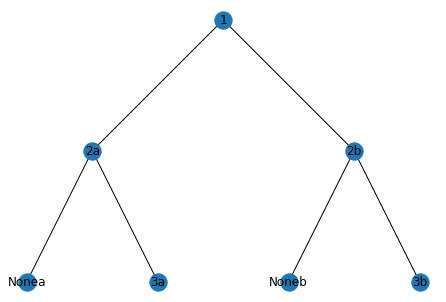

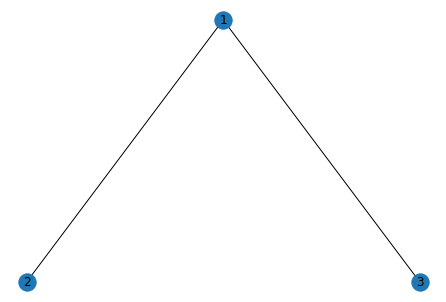

In [80]:
draw_tree([1,2,2,3,4,4,3])
draw_tree([1,2,2,None,3,None,3])
draw_tree([[1,2], [1,3]], binary=False)